In [57]:
# import library

import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
import nltk

In [58]:
df = pd.read_csv('umk_tweets_202112_clean.csv')

In [59]:
df.head()

,tweet,userid
0,umk sragen ditetapkan rp rp sayang terendah so...,949224511508955136
1,umk kota bekasi ump dki jakarta yak terobosss😭,1259379786566086658
2,umk yo regone mundak maneh bos,1572322873
3,umk kabupatenkota jawa resmi diumumkan kota se...,949224511508955136
4,sumpah umk malang segini iya mending nyari ker...,181023564


## Distribusi Frekuensi Jumlah Karakter per Data

Sekarang kita akan mencoba melihat distribusi jumlah karakter per data yang kita miliki. Disini kita bisa melihat bagaimana persebaran panjang tweet secara keseluruhan.

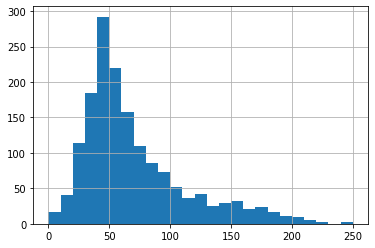

In [60]:
bin_range = np.arange(0, 260, 10)
df['tweet'].str.len().hist(bins=bin_range)
plt.show()


Dari sini kita bisa melihat, distribusi terbanyak berada pada 30 - 60 karakter per tweet. Dengan tweet yang memiliki panjang diatas 100 karakter, setiap nilainya tidak lebih dari 50 tweet.

## Distribusi Frekuensi Jumlah Kata per Data

Sekarang kita akan mencoba melihat distribusi jumlah kata per data yang kita miliki. Disini kita bisa melihat bagaimana persebaran panjang tweet secara keseluruhan.

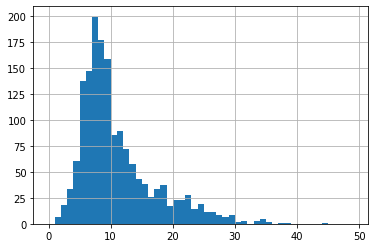

In [61]:
bin_range = np.arange(0, 50)
df['tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

## Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data

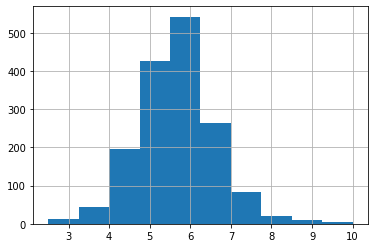

In [62]:
df['tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

Dari sini kita bisa melihat, distribusi terbanyak berada pada 5 - 10 kata per tweet. Tweet dengan jumlah kata di atas 15 bisa dibilang tidak terlalu banyak.

Jika kita gabungkan hasil analisa sebelumnya, maka kita tahu mayoritas tweet berada pada 5 -10 kata dengan setiap kata berada di antara 5 - 7 karakter dan total 30 - 60 karakter. Bisa dibilang cukup banyak orang yang memberikan tweet dengan opini.

## Distribusi Frekuensi Kata

Mencari Most Frequency Word merupakan salah satu hal penting untuk dapat dilakukan, karena dengan hal ini kita bisa melakukan analisis secara kasar tentang bagaimana fitur yang dimiliki oleh data yang kita ambil. Kita juga dapat melihat bahasa slang yang sering keluar yang bisa kita bersihkan. Akan tetapi karena dataset yang kita miliki sudah bersih, sehingga hal tersebut bisa kita lewati pada kesempatan kali ini.

In [63]:
# Pertama kita lakukan tokenization pada dataset kita

df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(str(x)))

In [64]:
# masukkan pada semua token tersebut pada satu list yang sama

tweets = [word for tweet in df['tweet'] for word in tweet]

In [65]:
fqdist = FreqDist(tweets)
print(fqdist)

<FreqDist with 3573 samples and 16905 outcomes>


In [66]:
# Untuk mengetahui kata dan jumlah dari masing-masing kata kita bisa menggunakan.

most_common_word = fqdist.most_common(20)
print(most_common_word)

[('umk', 1633), ('jawa', 589), ('tidak', 339), ('buruh', 320), ('kota', 253), ('gubernur', 239), ('timur', 237), ('barat', 236), ('rp', 197), ('upah', 173), ('kabupaten', 169), ('daftar', 156), ('kenaikan', 156), ('gaji', 146), ('besaran', 140), ('tertinggi', 124), ('daerah', 120), ('minimum', 117), ('kabupatenkota', 103), ('banten', 102)]


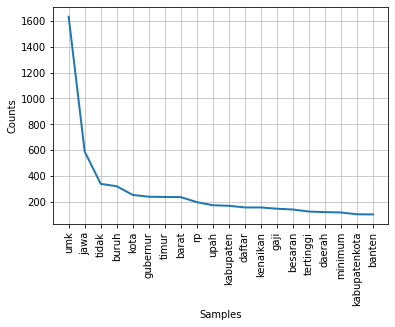

In [67]:
# Visualisasi

fqdist.plot(20,cumulative=False)
plt.show()

UMK berada di urutan teratas, bisa dimengerti dengan UMK adalah kata kunci pencarian kita. Jawa, Buruh, Kota, dan Gubernur menjadi kata selanjutnya yang sering keluar. Dari sini kita bisa mengambil kesimpulan keselurahan tweet adalah tentang UMK Buruh di Kota dan Provinsi Pulan Jawa.

## Distribusi N-Gram

Kekurangan dari melihat hanya dari distribusi kata adalah kita yang akan kesulitan dalam memahami makna, dikarenakan satu kata pada umumnya akan sulit menjelaskan pertanyaan "WHY" (Kenapa dengan tweet ini, apa yang menyebabkan UMK menjadi kata kunci tertinggi). saat itulah N-Gram bermain.

Untuk memperlihatkan nilai n-gram kita bisa melakukan dengan module ngram pada NLTK

In [68]:
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]

2 karena kita melakukan bi-gram

:20 artinya kita mengambil 20 nilai teratas.

In [69]:
print (result)

(jawa, timur)               232
(jawa, barat)               227
(umk, jawa)                 169
(upah, minimum)             116
(kenaikan, umk)             102
(besaran, umk)               93
(gubernur, jawa)             77
(daftar, umk)                73
(ridwan, kamil)              64
(umk, kabupaten)             64
(gaji, umk)                  63
(umk, kota)                  56
(rp, ribu)                   55
(penetapan, umk)             54
(daftar, lengkap)            48
(umk, kabupatenkota)         47
(kota, bekasi)               47
(tetapkan, umk)              45
(umk, tidak)                 41
(minimum, kabupatenkota)     41
dtype: int64


Dengan melihat bi-gram tersebut kita mendapat gambaran yang lebih jelas, bahwa keseluruhan tweet membahas tentang kenaikan UMK terutama di Jawa Barat dan Jawa Timur. Dari hasil ini sebenarnya terlihat bahwa UMK bisa menjadi salah satu stopword yang kita pilih, karena akan memberikan kesempatan kata lain untuk masuk. Dimana untuk UMK sendiri kita sudah tahu bahwa itu kata kunci penting karena pencarian kita berdasar pada kata tersebut.